In [102]:
import pandas as pd
import numpy as np
import seaborn as sns


In [103]:
#!unzip /content/archive.zip

In [104]:
data = pd.read_csv('/content/Train.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [105]:
data['Segmentation'].unique()


array(['D', 'A', 'B', 'C'], dtype=object)

In [106]:
data_copy = data.copy()

In [107]:

data_copy.shape

(8068, 11)

In [108]:
data_copy.drop(columns = ['Var_1','Segmentation','ID'],inplace=True)

In [109]:
data_copy.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [110]:
data_copy.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [111]:
data_copy.drop(columns = ['Work_Experience'], inplace=True)

In [112]:
data_copy['Family_Size'] = data_copy['Family_Size'].fillna(data_copy['Family_Size'].mean())

In [113]:
data_copy.isnull().sum()

Gender              0
Ever_Married      140
Age                 0
Graduated          78
Profession        124
Spending_Score      0
Family_Size         0
dtype: int64

In [114]:
data_copy.isnull().sum()

Gender              0
Ever_Married      140
Age                 0
Graduated          78
Profession        124
Spending_Score      0
Family_Size         0
dtype: int64

In [115]:
data_copy = data_copy.dropna(subset=['Profession', 'Ever_Married','Graduated'])

In [116]:
data_copy.isnull().sum()

Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
dtype: int64

In [117]:
data_copy.shape

(7741, 7)

In [118]:
data_copy['Profession'].value_counts()

Artist           2473
Healthcare       1286
Entertainment     925
Engineer          679
Doctor            673
Lawyer            604
Executive         583
Marketing         280
Homemaker         238
Name: Profession, dtype: int64

In [119]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_copy['Profession'] = LE.fit_transform(data_copy['Profession'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
integer_mapping = {l: i for i, l in enumerate(LE.classes_)}
integer_mapping

{'Artist': 0,
 'Doctor': 1,
 'Engineer': 2,
 'Entertainment': 3,
 'Executive': 4,
 'Healthcare': 5,
 'Homemaker': 6,
 'Lawyer': 7,
 'Marketing': 8}

In [121]:
data_copy.head(1)

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,Male,No,22,No,5,Low,4.0


In [122]:
data_copy['Gender'] = LE.fit_transform(data_copy['Gender'])
gender_mapping = {l: i for i, l in enumerate(LE.classes_)}
gender_mapping

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


{'Female': 0, 'Male': 1}

In [123]:

'''
Profession --> {'Artist': 0,
 'Doctor': 1,
 'Engineer': 2,
 'Entertainment': 3,
 'Executive': 4,
 'Healthcare': 5,
 'Homemaker': 6,
 'Lawyer': 7,
 'Marketing': 8}
'''

data_copy.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,1,No,22,No,5,Low,4.0
1,0,Yes,38,Yes,2,Average,3.0
2,0,Yes,67,Yes,2,Low,1.0
3,1,Yes,67,Yes,7,High,2.0
4,0,Yes,40,Yes,3,High,6.0


In [124]:
data_copy['Spending_Score'] = LE.fit_transform(data_copy['Spending_Score'])
score_mapping = {l: i for i, l in enumerate(LE.classes_)}
score_mapping

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


{'Average': 0, 'High': 1, 'Low': 2}

In [125]:
data_copy.head(1)

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,1,No,22,No,5,2,4.0


In [126]:
data_copy['Ever_Married'] = LE.fit_transform(data_copy['Ever_Married'])
marriage_mapping = {l: i for i, l in enumerate(LE.classes_)}
marriage_mapping

{'No': 0, 'Yes': 1}

In [127]:
data_copy['Graduated'] = LE.fit_transform(data_copy['Graduated'])
graduation_mapping = {l: i for i, l in enumerate(LE.classes_)}
graduation_mapping

{'No': 0, 'Yes': 1}

In [128]:
data_copy.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,1,0,22,0,5,2,4.0
1,0,1,38,1,2,0,3.0
2,0,1,67,1,2,2,1.0
3,1,1,67,1,7,1,2.0
4,0,1,40,1,3,1,6.0


In [129]:
corr_mat = data_copy.corr()

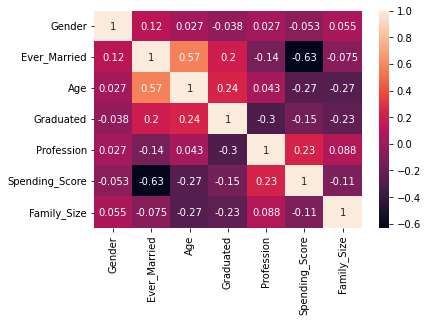

In [130]:
import matplotlib.pyplot as plt
sns.heatmap(corr_mat,annot = True)

In [131]:
pd.DataFrame(data_copy.groupby(['Gender'])['Age'].mean())
#Female-->0, male-->1

,Age
Gender,
0,43.016905
1,43.913432


In [132]:
pd.DataFrame(data_copy.groupby(['Gender'])['Ever_Married'].sum())
#Female-->0, male-->1

,Ever_Married
Gender,
0,1825
1,2710


In [133]:
data_copy = data_copy.astype(np.float32)
data_copy['Age'] = data_copy['Age']/data_copy['Age'].mean()
data_copy.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,1.0,0.0,0.505640,0.0,5.0,2.0,4.0
1,0.0,1.0,0.873378,1.0,2.0,0.0,3.0
2,0.0,1.0,1.539903,1.0,2.0,2.0,1.0
3,1.0,1.0,1.539903,1.0,7.0,1.0,2.0
4,0.0,1.0,0.919345,1.0,3.0,1.0,6.0


In [134]:
from sklearn.cluster import KMeans, k_means

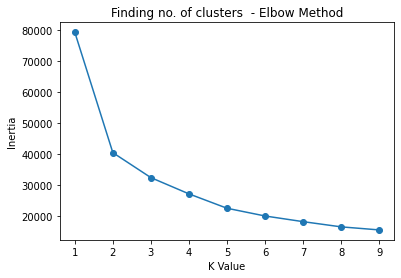

In [135]:
k = np.arange(1,10)

inertia = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=511)
    kmeans.fit(data_copy)
    inertia.append(kmeans.inertia_)

plt.plot(k,inertia,"o-")
plt.xticks(k)
plt.xlabel("K Value")
plt.ylabel("Inertia")
plt.title("Finding no. of clusters  - Elbow Method")
plt.show()

In [136]:
clustering=KMeans(n_clusters=4,random_state=484)
clustering.fit(data_copy)
data_copy["Cluster"]=clustering.labels_
data_copy.sample(5)

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Cluster
7064,1.0,1.0,1.631837,1.0,4.0,1.0,4.0,0
5833,0.0,1.0,0.804427,1.0,3.0,0.0,2.0,2
6891,0.0,1.0,1.976592,1.0,7.0,2.0,2.0,3
3542,1.0,1.0,0.896361,1.0,3.0,0.0,4.0,2
4448,0.0,1.0,1.310067,1.0,0.0,0.0,3.0,1
